In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import matplotlib.gridspec as gridspec
pd.set_option("display.max_columns",101)
pd.set_option('display.float_format', lambda x: '%.5f' % x) #为了直观的显示数字，不采用科学计数法
pd.options.display.max_rows = 15 #最多显示15行
import warnings

import imblearn
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost.sklearn import XGBClassifier

Using TensorFlow backend.


In [2]:
rawdata=pd.read_csv('cs_training.csv',index_col=[0])
rawdata.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000
2,0,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000
3,0,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000
4,0,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000
5,0,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000


In [3]:
column={'ID':'用户ID',
        'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}
rawdata.rename(columns=column,inplace=True)
rawdata.head()

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
1,1,0.76613,45,2,0.80298,9120.00000,13,0,6,0,2.00000
2,0,0.95715,40,0,0.12188,2600.00000,4,0,0,0,1.00000
3,0,0.65818,38,1,0.08511,3042.00000,2,1,0,0,0.00000
4,0,0.23381,30,0,0.03605,3300.00000,5,0,0,0,0.00000
5,0,0.90724,49,1,0.02493,63588.00000,7,0,1,0,0.00000


In [4]:
rawdata.describe().T

,count,mean,std,min,25%,50%,75%,max
好坏客户,150000.00000,0.06684,0.24975,0.00000,0.00000,0.00000,0.00000,1.00000
可用额度比值,150000.00000,6.04844,249.75537,0.00000,0.02987,0.15418,0.55905,50708.00000
年龄,150000.00000,52.29521,14.77187,0.00000,41.00000,52.00000,63.00000,109.00000
逾期30-59天笔数,150000.00000,0.42103,4.19278,0.00000,0.00000,0.00000,0.00000,98.00000
负债率,150000.00000,353.00508,2037.81852,0.00000,0.17507,0.36651,0.86825,329664.00000
月收入,120269.00000,6670.22124,14384.67422,0.00000,3400.00000,5400.00000,8249.00000,3008750.00000
信贷数量,150000.00000,8.45276,5.14595,0.00000,5.00000,8.00000,11.00000,58.00000
逾期90天笔数,150000.00000,0.26597,4.16930,0.00000,0.00000,0.00000,0.00000,98.00000
固定资产贷款量,150000.00000,1.01824,1.12977,0.00000,0.00000,1.00000,2.00000,54.00000
逾期60-89天笔数,150000.00000,0.24039,4.15518,0.00000,0.00000,0.00000,0.00000,98.00000


In [5]:
# 查看数据维度
rawdata.shape
# 查看数据类型和缺失值
rawdata.info()
# 查看标签分布
rawdata['好坏客户'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
好坏客户          150000 non-null int64
可用额度比值        150000 non-null float64
年龄            150000 non-null int64
逾期30-59天笔数    150000 non-null int64
负债率           150000 non-null float64
月收入           120269 non-null float64
信贷数量          150000 non-null int64
逾期90天笔数       150000 non-null int64
固定资产贷款量       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家属数量          146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


0    139974
1     10026
Name: 好坏客户, dtype: int64

## 特征工程

In [6]:
rawdata.drop_duplicates(inplace=True)    # 去重
rawdata.index=range(rawdata.shape[0])    # 重置索引
rawdata.shape
# 查看缺失值情况
rawdata.isnull().mean()

好坏客户         0.00000
可用额度比值       0.00000
年龄           0.00000
逾期30-59天笔数   0.00000
负债率          0.00000
月收入          0.19560
信贷数量         0.00000
逾期90天笔数      0.00000
固定资产贷款量      0.00000
逾期60-89天笔数   0.00000
家属数量         0.02562
dtype: float64

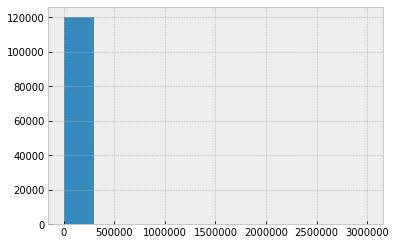

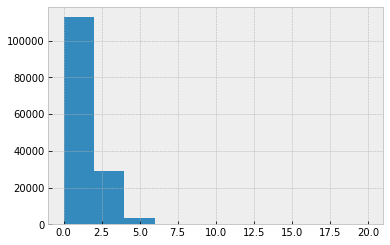

In [7]:
null_list=['月收入','家属数量']
for col in null_list:
    plt.style.use('bmh')
    plt.hist(rawdata[col].dropna().values)
    plt.show()


数据呈现正偏态。由于“家属数量”缺失较少，我们直接用中位数填充。

In [8]:
rawdata['家属数量'].fillna(rawdata['家属数量'].median(),inplace=True)

“月收入”这个特征对于征信来说非常重要，在这里采用随机森林填补法来填充，即将缺失的特征值作为预测值，将未缺失的“月收入”数据作为训练样本的标签。

In [9]:
# 定义随机森林填补函数
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict


X = rawdata.iloc[:,1:]
y = rawdata['好坏客户']

y_pred = fill_missing_rf(X,y,'月收入')
rawdata.loc[rawdata.loc[:,'月收入'].isnull(),'月收入'] = y_pred

## 异常值处理

[Text(0,0,'信贷数量'), Text(0,0,'固定资产贷款量')]

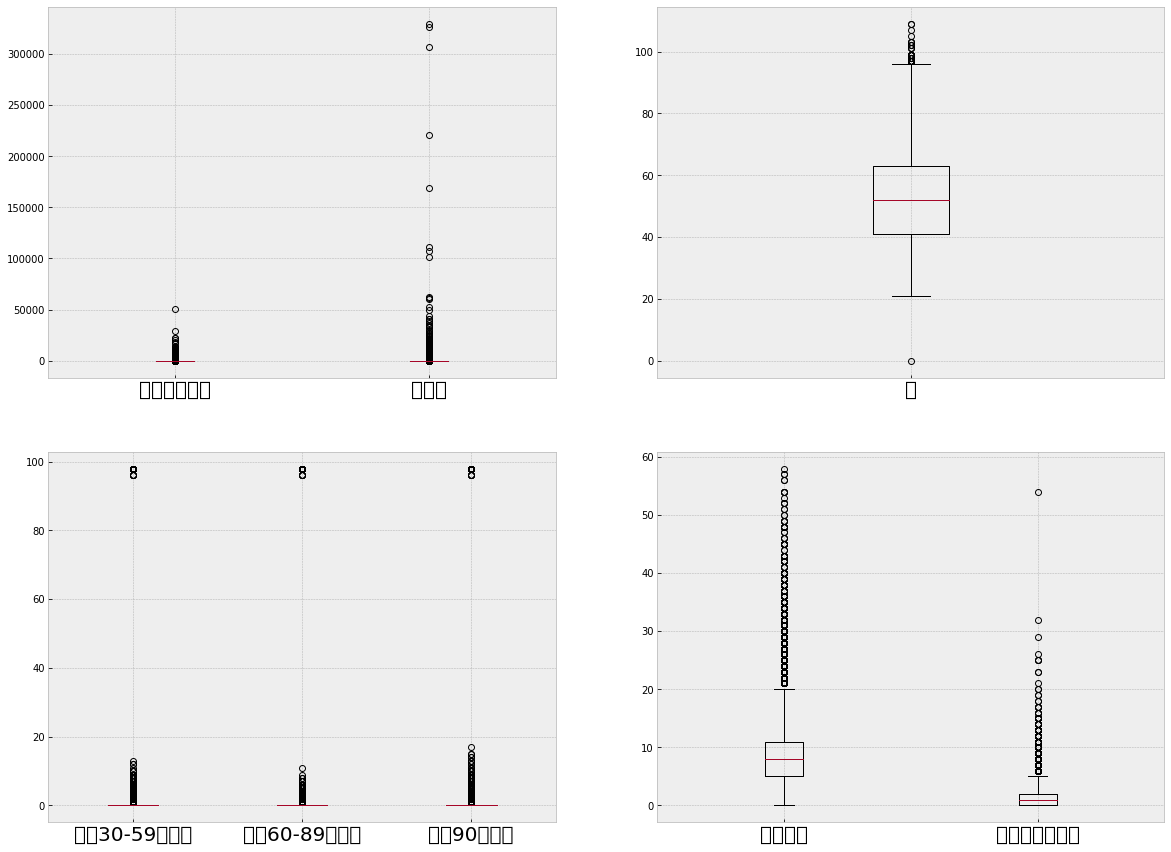

In [10]:
x1=rawdata['可用额度比值']
x2=rawdata['负债率']
x3=rawdata['年龄']
x4=rawdata['逾期30-59天笔数']
x5=rawdata['逾期60-89天笔数']
x6=rawdata['逾期90天笔数']
x7=rawdata['信贷数量']
x8=rawdata['固定资产贷款量']

fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.boxplot([x1,x2])
ax1.set_xticklabels(["可用额度比值","负债率"], fontsize=20)

ax2.boxplot(x3)
ax2.set_xticklabels("年龄", fontsize=20)

ax3.boxplot([x4,x5,x6])
ax3.set_xticklabels(["逾期30-59天笔数","逾期60-89天笔数","逾期90天笔数"], fontsize=20)

ax4.boxplot([x7,x8])
ax4.set_xticklabels(["信贷数量","固定资产贷款量"], fontsize=20)


In [11]:
rawdata[rawdata['年龄']<18]

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
65553,0,1.00000,0,1,0.43693,6000.00000,6,0,2,0,2.00000


In [12]:
rawdata=rawdata[rawdata['年龄']!=0]
print(
rawdata[rawdata['逾期30-59天笔数']>90].shape,
rawdata[rawdata['逾期60-89天笔数']>90].shape,
rawdata[rawdata['逾期90天笔数']>90].shape)

(225, 11) (225, 11) (225, 11)


In [13]:
rawdata[rawdata.loc[:,'逾期30-59天笔数']>90]

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
1732,1,1.00000,27,98,0.00000,2700.00000,0,98,0,98,0.00000
2285,0,1.00000,22,98,0.00000,1423.79327,0,98,0,98,0.00000
3883,0,1.00000,38,98,12.00000,2430.15000,0,98,0,98,0.00000
4416,0,1.00000,21,98,0.00000,0.00000,0,98,0,98,0.00000
4704,0,1.00000,21,98,0.00000,2000.00000,0,98,0,98,0.00000
5072,0,1.00000,33,98,0.00000,1500.00000,0,98,0,98,0.00000
6279,1,1.00000,51,98,0.00000,7500.00000,0,98,0,98,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
145669,1,1.00000,28,98,0.00000,1664.00000,0,98,0,98,0.00000
146538,1,1.00000,37,98,0.00758,3166.00000,0,98,0,98,0.00000


In [14]:
# 删除异常数据
rawdata=rawdata[rawdata.loc[:,'逾期30-59天笔数']<90]

## 处理样本不平衡

我们在之前查看过标签分布情况，0:1=139974:10026，是存在严重的样本不平衡的。这是在金融风控中非常常见的，因为会存在严重违约的用户毕竟是少数。
在这里我们采取SMOTE上采样的方法处理数据不平衡。需要导入另一个机器学习库imblearn。


In [15]:

smote=SMOTE(random_state=404)
X,y=smote.fit_sample(rawdata.iloc[:,1:],rawdata.iloc[:,0])

In [16]:
data=pd.concat((pd.DataFrame(y),X),axis=1)

## 分箱

常用的分箱方法主要有三种：等频分箱、等宽分箱、CART树分箱。我们选择最优的CART树分箱方法，将分箱的函数都写在一个cart_bins.py的类文件里，下面贴出了最重要的一个自动分箱函数

In [17]:
def auto_bins(df,y,x,p=0.01,max_bin=20,plot=True):
    """
    参数
    df:传入需要进行分箱的数据集
    y:标签名
    x:进行分箱的特征名
    p:叶子包含观测数的最小占比(0<p<0.5)，默认为0.01
    max_bin:最大箱子数(大于2)，默认为20
    plot:是否画WOE图
    """
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    import numpy as np
    import pandas as pd
    
    # 指明X和Y变量数据,排除NA值
    X = np.array(df[x][df[x].notna()]).reshape(-1,1)
    Y = df[y][df[x].notna()]
   
    # 调参,得到最合适的叶节点观测占比
    gini_impure = np.linspace(0,0.001,50)
    param_grid = {"min_impurity_decrease":gini_impure}
    Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,iid=False)
    Es.fit(X,Y)
    
    # 使用最优参数构建树模型
    ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
    ES.fit(X,Y)
    
    # 输出树结构
    TS = tree_structure(ES,x)
    
    # 抽取测试节点的阈值
    TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
    # 计算最优分割点
    CP = np.append(TH,np.array([X.max(),X.min()]))
    CP.sort()
    
    # 使用自定义分箱函数
    smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
    
    out_a = pd.Series({"Tree_structure":TS})
    
    out = smbin_cust.append(out_a)

    return(out)

#cut1 = auto_bins(data,'好坏客户','可用额度比值')

##  LR 建模

金融风控中最常用的模型是逻辑回归模型，虽然现在很多企业开始使用性能更好的GBDT、XGBoost，甚至更加改进的Light GBM进行建模，但LR有着它自己独特的优势：

1、逻辑回归经过信贷历史的反复验证是有效的

2、模型比较稳定相对成熟

3、建模过程透明而不是黑箱

4、不太容易过拟合

本案例选择LR逻辑回归进行建模。
首先切分训练集和测试集。


In [18]:
from sklearn.model_selection import train_test_split
X,y=rawdata.iloc[:,1:],rawdata.iloc[:,0]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=1221)

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

glmodel = sm.GLM(Y_train,X_train,family=sm.families.Binomial()).fit()
glmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   好坏客户   No. Observations:               104415
Model:                            GLM   Df Residuals:                   104405
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21235.
Date:                Fri, 06 Mar 2020   Deviance:                       42471.
Time:                        14:34:36   Pearson chi2:                 5.47e+05
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
可用额度比值        -0.0001    9.9e-05     -1.038      0.299      -0.000    9.13e-05
年龄            -0.0599      0.001    -90.112      0.000      -0.061      -0.059
逾期30-59天笔数     0.5677      0.014     41.951      0.000       0.541       0.594
负债率        -7.349e-05   1.57e-05     -4.685      0.000      -0.000   -4.27e-05
月收入         -3.58e-05   3.88e-06     -9.223      0.000   -4.34e-05   -2.82e-05
信贷数量          -0.0213      0.003     -6.338      0.000      -0.028      -0.015
逾期90天笔数        0.7786      0.020     39.057      0.000       0.740       0.818
固定资产贷款量        0.1478      0.013     11.112      0.000       0.122       0.174
逾期60-89天笔数     0.6963      0.028     25.209      0.000       0.642       0.750
家属数量          -0.0235      0.012     -2.002      0.045      -0.046      -0.000
==============================================================================
"""

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model.logistic import LogisticRegression  

#按照80%的比例，把两个数据集又分为训练集和测试集（X_1,Y_1是训练集，X_2, Y_2是测试集）
X_1, X_2, Y_1, Y_2 = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


##  LR

In [71]:
Y_pred

array([0.03030531, 0.03314995, 0.02180207, ..., 0.01289152, 0.02945417,
       0.0414216 ])

accuracy: 0.9371836556833038
[[27677  1681]
 [  193   282]]


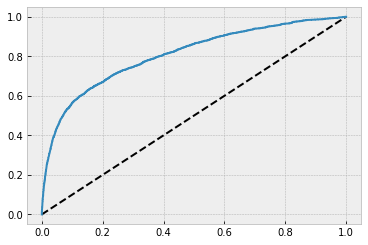

In [72]:
logic_clf = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
  #生成一个逻辑回归模型
logic_clf.fit(X_1,Y_1)
predictions = logic_clf.predict(X_2) 
#用模型对X_2进行测试，即判断X_2里面每个记录的违约情况，并把结果储存在predictions中
Y_pred = logic_clf.predict_proba(X_2)[:, 1]
matrix = confusion_matrix(predictions, Y_2) #显示混淆矩阵
score = logic_clf.score(X_2, Y_2) # 用模型对X_2进行测试，并与Y_2比较，获得准确率
print("accuracy:",score)
print(matrix)  
fpr_lr, tpr_lr, _ = roc_curve(Y_2,Y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')


array([[0.97322972, 0.02677028],
       [0.96071522, 0.03928478],
       [0.94887267, 0.05112733],
       ...,
       [0.9113337 , 0.0886663 ],
       [0.94755895, 0.05244105],
       [0.92670774, 0.07329226]])

## Native Bayies

accuracy: 0.9253511212415781
[[26920  1277]
 [  950   686]]


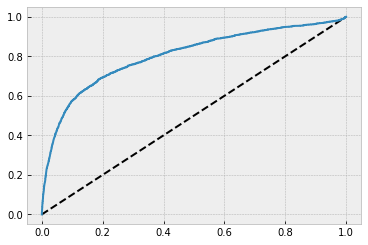

In [74]:
#换一个朴素贝叶斯 高斯模型来预测
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()  
gnb_clf.fit(X_1,Y_1)

gnb_prediction = gnb_clf.predict(X_2)
gnb_pred=gnb_clf.predict_proba(X_2)[:,1]
gnb_matrix = confusion_matrix(gnb_prediction, Y_2)
gnb_score = gnb_clf.score(X_2, Y_2)
print("accuracy:",gnb_score)
print( gnb_matrix)
fpr_NB, tpr_NB, _ = roc_curve(Y_2,gnb_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_NB, tpr_NB, label='NB')

## GBDT+LR

In [23]:
############ GBDT+LR
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
gbm1 = GradientBoostingClassifier(n_estimators=5, random_state=10, subsample=0.6, max_depth=5,
                                  min_samples_split=900)
gbm1.fit(X_1, Y_1)
train_new_feature = gbm1.apply(X_1)
train_new_feature = train_new_feature.reshape(-1, 5)
enc = OneHotEncoder()

enc.fit(train_new_feature)

# 每一个属性的最大取值数目
# print('每一个特征的最大取值数目:', enc.n_values_)
# print('所有特征的取值数目总和:', enc.n_values_.sum())

train_new_feature2 = np.array(enc.transform(train_new_feature).toarray())

test_new_feature = gbm1.apply(X_2)
test_new_feature = test_new_feature.reshape(-1, 5)


test_new_feature2 = np.array(enc.transform(test_new_feature).toarray())

In [24]:
logic_clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
  #生成一个逻辑回归模型
X_1.index=range(0,len(X_1))
X_train=pd.concat((X_1,pd.DataFrame(train_new_feature2)),axis=1)
logic_clf.fit(X_train,Y_1)
X_2.index=range(0,len(X_2))
X_test=  pd.concat((X_2,pd.DataFrame(test_new_feature2)),axis=1)  


predictions = logic_clf.predict(X_test) 
matrix = confusion_matrix(predictions, Y_2) #显示混淆矩阵
score = logic_clf.score(X_test, Y_2) # 用模型对X_2进行测试，并与Y_2比较，获得准确率
print("accuracy:",score)
matrix  

accuracy: 0.9370830959005129


array([[27631,  1638],
       [  239,   325]])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_train_lr, Y_train, Y_train_lr = train_test_split(X_train, Y_train, random_state=233, test_size=0.2)

In [75]:
def XGBoostLR():
    XGB = xgb.XGBClassifier(nthread=4, learning_rate=0.08, n_estimators=100, colsample_bytree=0.5)
    XGB.fit(X_train, Y_train)
    OHE = OneHotEncoder()
    OHE.fit(XGB.apply(X_train)[:, :, 0])
    LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
    LR.fit(OHE.transform(XGB.apply(X_train_lr)), Y_train_lr)
    Y_pred = LR.predict_proba(OHE.transform(XGB.apply(X_test)))[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('XGBoost + LogisticRegression: ', auc)
    return fpr, tpr


In [80]:
def GBDTLR():
    GBDT = GradientBoostingClassifier(n_estimators=10)
    GBDT.fit(X_train, Y_train)
    OHE = OneHotEncoder()
    OHE.fit(GBDT.apply(X_train))
    LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
    LR.fit(OHE.transform(GBDT.apply(X_train_lr)[:, :, 0]), Y_train_lr)
    Y_pred = LR.predict_proba(OHE.transform(GBDT.apply(X_test)[:, :, 0]))[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('GradientBoosting + LogisticRegression: ', auc)
    return fpr, tpr

In [81]:
def LR():
    LR = LogisticRegression(n_jobs=4, C=0.1, penalty='l2')
    LR.fit(X_train, Y_train)
    Y_pred = LR.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('LogisticRegression: ', auc)
    return fpr, tpr

In [82]:
def XGBoost():
    XGB = xgb.XGBClassifier(nthread=4, learning_rate=0.08, n_estimators=100, colsample_bytree=0.5)
    XGB.fit(X_train, Y_train)
    Y_pred = XGB.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('XGBoost: ', auc)
    return fpr, tpr

In [83]:
    fpr_xgb_lr, tpr_xgb_lr = XGBoostLR()
    fpr_xgb, tpr_xgb = XGBoost()
    fpr_lr, tpr_lr = LR()
    fpr_gbdt_lr, tpr_gbdt_lr = GBDTLR()

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_gbdt_lr, tpr_gbdt_lr, label='GBT + LR')
    plt.plot(fpr_xgb, tpr_xgb, label='XGB')
    plt.plot(fpr_lr, tpr_lr, label='LR')
    plt.plot(fpr_xgb_lr, tpr_xgb_lr, label='XGB + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

    plt.figure(2)
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_gbdt_lr, tpr_gbdt_lr, label='GBT + LR')
    plt.plot(fpr_xgb, tpr_xgb, label='XGB')
    plt.plot(fpr_lr, tpr_lr, label='LR')
    plt.plot(fpr_xgb_lr, tpr_xgb_lr, label='XGB + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (zoomed in at top left)')
    plt.legend(loc='best')
    plt.show()


IndexError: too many indices for array